In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load data
store_df = pd.read_csv('../Data/store.csv')
train_df = pd.read_csv('../Data/train.csv')
test_df = pd.read_csv('../Data/test.csv')

C:\Users\Coop\AppData\Local\Temp\ipykernel_11224\746974151.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../Data/train.csv')


In [14]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9,2008,0,0,0,None
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9,2009,0,0,0,None
4,5,a,a,29910.0,4,2015,0,0,0,None


In [6]:
# Data cleaning
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0).astype(int)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0).astype(int)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0).astype(int)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0).astype(int)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna('None')

Distribution of Promotions in Training vs. Test Sets

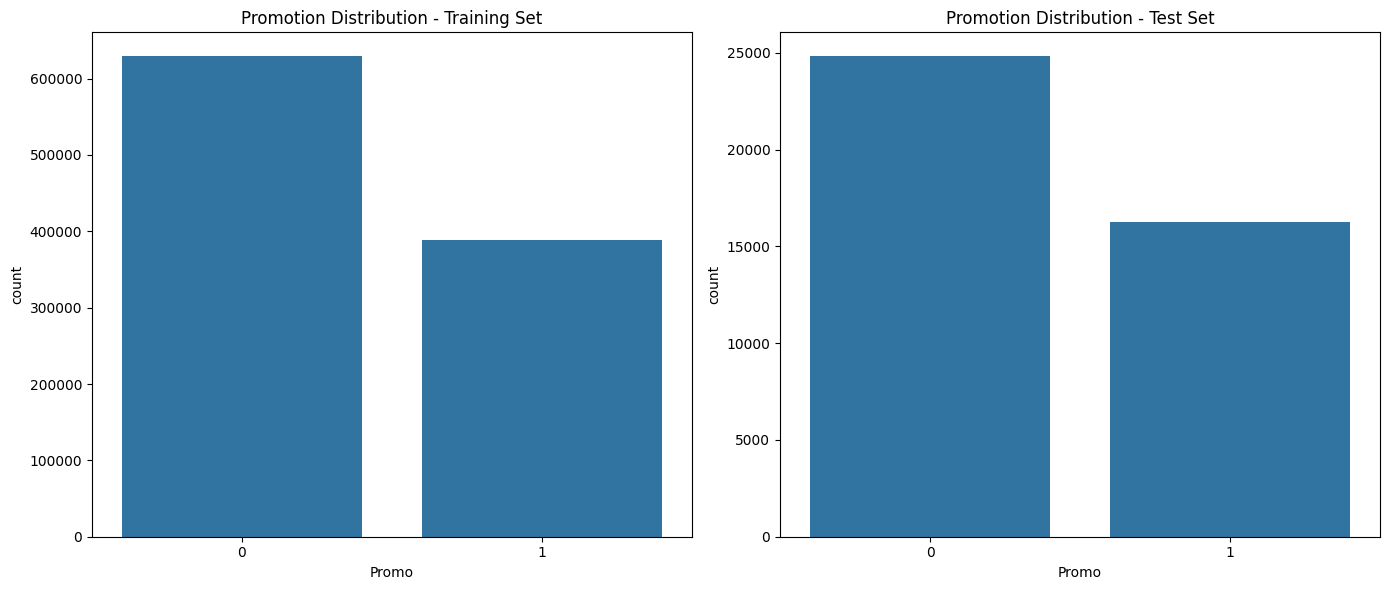

In [7]:

# Plot distribution of promotions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='Promo', data=train_df, ax=axes[0])
axes[0].set_title('Promotion Distribution - Training Set')

sns.countplot(x='Promo', data=test_df, ax=axes[1])
axes[1].set_title('Promotion Distribution - Test Set')

plt.tight_layout()
plt.show()


Sales Behavior Before, During, and After Holidays

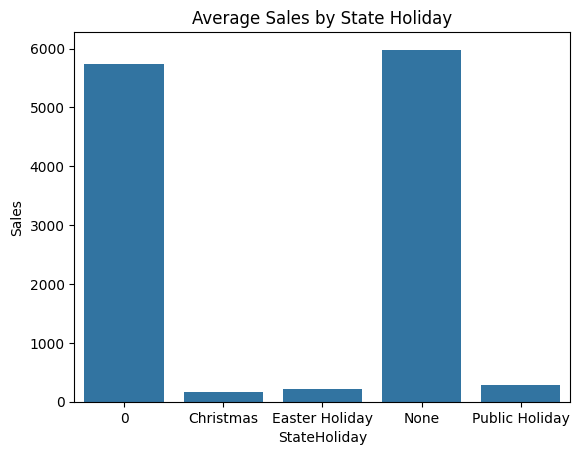

In [8]:
# Example data: sales behavior around state holidays
train_df['StateHoliday'] = train_df['StateHoliday'].replace({'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas', '0': 'None'})

# Plot sales before, during, and after holidays
holiday_sales = train_df.groupby('StateHoliday')['Sales'].mean().reset_index()

sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales)
plt.title('Average Sales by State Holiday')
plt.show()


Seasonal Purchase Behaviors

In [20]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [16]:
print(store_df.columns)


Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [26]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,None,1
1,2,5,2015-07-31,6064,625,1,1,None,1
2,3,5,2015-07-31,8314,821,1,1,None,1
3,4,5,2015-07-31,13995,1498,1,1,None,1
4,5,5,2015-07-31,4822,559,1,1,None,1


In [27]:
# Assuming we use 'PromoInterval' to infer seasonality
promo_interval_sales = store_df.groupby('PromoInterval')['Sales'].mean().reset_index()

sns.barplot(x='PromoInterval', y='Sales', data=promo_interval_sales)
plt.title('Average Sales by Promo Interval')
plt.show()


KeyError: 'Column not found: Sales'

: 